In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('career_prediction_dataset.csv')

In [9]:
# --- Basic Inspection ---
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,interest_programming,interest_data_analysis,interest_system_architecture,interest_hardware,interest_visual_design,workstyle_focus,workstyle_collaboration,workstyle_pace,workstyle_problem_type,skill_abstract_problem_solving,...,skill_visual_design,skill_leadership,motivator_primary_driver,motivator_risk_tolerance,pref_learning_style,pref_project_type,pref_core_focus,pref_user_proximity,pref_patience_for_impact,career
0,5,2,4,1,2,1,3,5,4,4,...,1,3,2,4,2,3,4,3,3,Software Engineer
1,5,2,4,1,3,2,3,3,5,5,...,1,2,1,3,2,3,5,1,3,Software Engineer
2,5,2,4,1,3,2,4,5,5,5,...,1,2,1,3,3,2,5,3,5,Software Engineer
3,4,2,3,1,2,2,2,4,5,4,...,2,2,1,3,2,1,5,2,3,Software Engineer
4,5,1,4,2,1,3,4,5,5,5,...,2,2,1,4,3,1,4,1,5,Software Engineer


In [4]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   interest_programming              2600 non-null   int64 
 1   interest_data_analysis            2600 non-null   int64 
 2   interest_system_architecture      2600 non-null   int64 
 3   interest_hardware                 2600 non-null   int64 
 4   interest_visual_design            2600 non-null   int64 
 5   workstyle_focus                   2600 non-null   int64 
 6   workstyle_collaboration           2600 non-null   int64 
 7   workstyle_pace                    2600 non-null   int64 
 8   workstyle_problem_type            2600 non-null   int64 
 9   skill_abstract_problem_solving    2600 non-null   int64 
 10  skill_math_quantitative           2600 non-null   int64 
 11  skill_communication_storytelling  2600 non-null   int64 
 12  skill

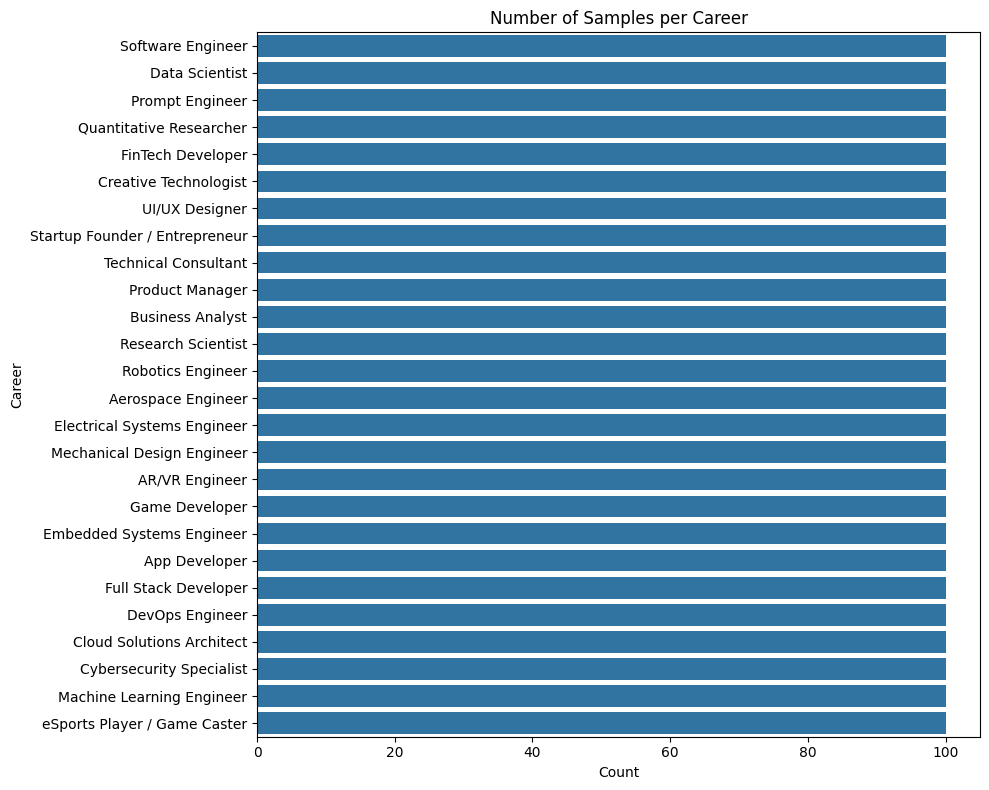

In [5]:
# --- Check Class Distribution ---
# Let's see if we have 100 samples for each career
plt.figure(figsize=(10, 8))
sns.countplot(y='career', data=df, order=df['career'].value_counts().index)
plt.title('Number of Samples per Career')
plt.xlabel('Count')
plt.ylabel('Career')
plt.tight_layout()
plt.show()

C:\Users\Ayush R\AppData\Local\Temp\ipykernel_59944\3433984497.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=career_programming_interest.values, y=career_programming_interest.index, palette='viridis')


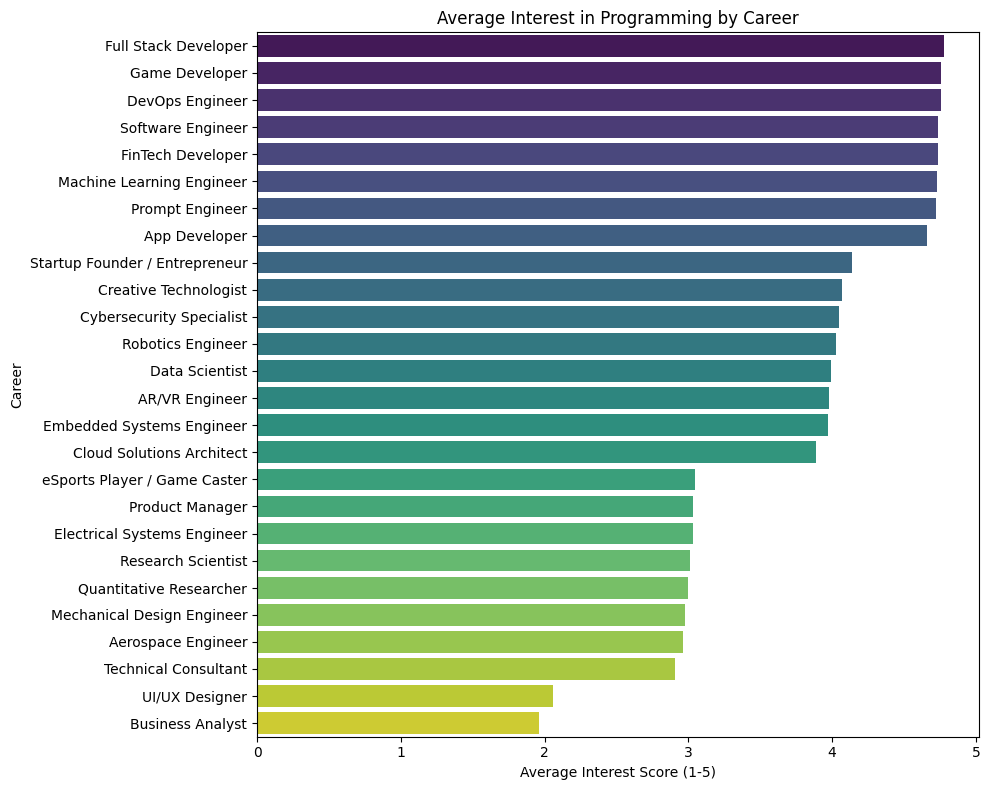

In [6]:
# --- Visualize a Key Pattern ---
# Let's check the average 'interest_programming' score for each career.
# We expect roles like Software Engineer and Game Developer to be high.
plt.figure(figsize=(10, 8))
# Group by career and get the mean, then sort
career_programming_interest = df.groupby('career')['interest_programming'].mean().sort_values(ascending=False)
sns.barplot(x=career_programming_interest.values, y=career_programming_interest.index, palette='viridis')
plt.title('Average Interest in Programming by Career')
plt.xlabel('Average Interest Score (1-5)')
plt.ylabel('Career')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# The dataframe 'df' is already loaded from the previous step

# --- 1. Separate Features (X) and Labels (y) ---
X = df.drop('career', axis=1) # All columns except the 'career' column
y = df['career']             # Only the 'career' column

print("Features (X) shape:", X.shape)
print("Labels (y) shape:", y.shape)

Features (X) shape: (2600, 21)
Labels (y) shape: (2600,)


In [ ]:
# --- 2. Encode Text Labels into Numbers ---
# A neural network can't understand "Software Engineer", so we convert it to a number like 22.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# You can see the mapping like this:
# print("\nLabel mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}: {i}")

In [12]:
# --- 3. Scale Numerical Features ---
# This standardizes the features (e.g., scales them to have mean=0, stddev=1).
# It's crucial for helping the neural network train efficiently.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- 4. Split Data into Training and Testing Sets ---
# We'll use 80% of the data to train the model, and 20% to test its performance.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,      # 20% of data will be for testing
    random_state=42,    # Ensures the split is the same every time you run
    stratify=y_encoded  # Ensures the class distribution is the same in train and test sets
)

print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (2080, 21)
Testing data shape: (520, 21)


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assume X_train, X_test, y_train, y_test are already created from the preprocessing step

# --- 1. Define the Model Architecture ---
# We'll create a simple sequential model, which is a stack of layers.

model = Sequential([
    # Input Layer: Must match the number of features (21 questions)
    # Dense means every neuron in this layer is connected to every neuron in the next.
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),

    # Hidden Layer 1: Helps the model learn complex patterns.
    Dense(64, activation='relu'),

    # Hidden Layer 2: Another layer to learn even more complex relationships.
    Dense(32, activation='relu'),

    # Output Layer: Must have 26 neurons (one for each career).
    # 'softmax' activation converts the output into a probability distribution,
    # giving us the probability for each of the 26 careers.
    Dense(26, activation='softmax')
])

# --- 2. Compile the Model ---
# This configures the model for training.
model.compile(
    optimizer='adam',  # Adam is a great all-around optimizer
    loss='sparse_categorical_crossentropy', # Use this loss function for multi-class classification with integer labels
    metrics=['accuracy'] # We want to monitor the accuracy during training
)

# You can print a summary of the model to see its structure
print("Model Summary:")
model.summary()


# --- 3. Train the Model ---
# This is where the learning happens!
print("\nStarting model training...")
history = model.fit(
    X_train,
    y_train,
    epochs=50,  # An epoch is one complete pass through the entire training dataset
    batch_size=32, # Process the data in batches of 32 samples at a time
    validation_split=0.2 # Use 20% of the training data for validation during training
)
print("Model training finished.")

Model Summary:


c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,010 (54.73 KB)

 Trainable params: 14,010 (54.73 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1169 - loss: 3.0347 - val_accuracy: 0.4087 - val_loss: 2.2733
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6422 - loss: 1.7374 - val_accuracy: 0.9111 - val_loss: 0.6795
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9279 - loss: 0.4858 - val_accuracy: 0.9495 - val_loss: 0.2696
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9667 - loss: 0.2078 - val_accuracy: 0.9784 - val_loss: 0.1643
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.1350 - val_accuracy: 0.9663 - val_loss: 0.1451
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9750 - loss: 0.1074 - val_accuracy: 0.9712 - val_loss: 0.1108
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9838 - loss: 0.0904 - val_accuracy: 0.9760 - val_loss: 0.0904
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9891 - loss: 0.0587 - val_

In [14]:
# --- Evaluate the model on the test set ---
loss, accuracy = model.evaluate(X_test, y_test)

print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9797 - loss: 0.0854  

Test Accuracy: 98.27%
Test Loss: 0.0691


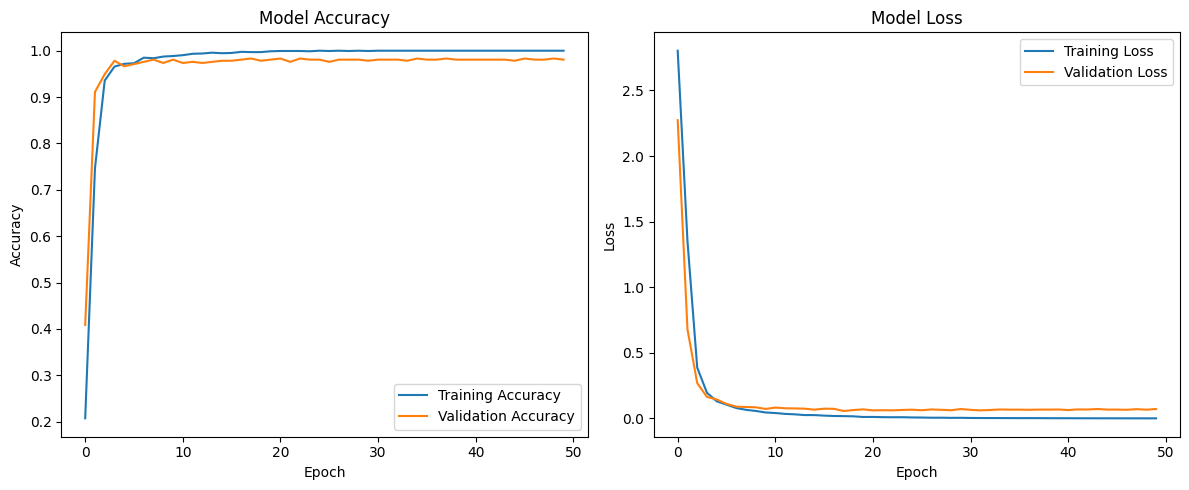

In [15]:
import matplotlib.pyplot as plt

# --- Plot Training & Validation Accuracy ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# --- Plot Training & Validation Loss ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
import joblib
from tensorflow.keras.models import load_model

# --- 1. Save the Trained Model ---
# This saves the model's architecture, weights, and training configuration.
model.save('career_prediction_model.h5')

# --- 2. Save the Scaler ---
# We need this to apply the exact same scaling to new user input.
joblib.dump(scaler, 'scaler.gz')

# --- 3. Save the Label Encoder ---
# We need this to convert the model's numerical output back into a career name.
joblib.dump(label_encoder, 'label_encoder.gz')

print("Model, scaler, and label encoder have been saved successfully!")

Model, scaler, and label encoder have been saved successfully!
